In [1]:
# Import dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Importing data files
pollution_data_df = pd.read_csv("Resources/pollution_2006_2010.csv")
mortality_data_df = pd.read_csv("Resources/mortality_2006_2010_clean.csv")

In [3]:
# Mortality data frame
mortality_data_df

,Unnamed: 0,Unnamed: 0.1,Year,ICD-10 113 Cause List,ICD-10 113 Cause List Code,County,County Code,Race,Race Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,0,0,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Female,F,15.0,204139.0,Unreliable
1,1,1,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Male,M,13.0,189589.0,Unreliable
2,2,2,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Black or African American,2054-5,Female,F,30.0,112599.0,26.6
3,3,3,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Black or African American,2054-5,Male,M,21.0,98714.0,21.3
4,4,4,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,White,2106-3,Female,F,73.0,410372.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,1647,2772,2010,"Other diseases of respiratory system (J00-J06,...",GR113-089,Santa Barbara,6083.0,White,2106-3,Male,M,12.0,187873.0,Unreliable
1529,1648,2773,2010,"Other diseases of respiratory system (J00-J06,...",GR113-089,Santa Clara,6085.0,White,2106-3,Female,F,39.0,532299.0,7.3
1530,1649,2774,2010,"Other diseases of respiratory system (J00-J06,...",GR113-089,Santa Clara,6085.0,White,2106-3,Male,M,43.0,549707.0,7.8
1531,1650,2777,2010,"Other diseases of respiratory system (J00-J06,...",GR113-089,Solano,6095.0,White,2106-3,Female,F,14.0,129084.0,Unreliable


In [4]:
# Drop "Unnamed: 0" and "Unnamed: 0.1" columns 
# Rename "ICD-10..." column 
mortality_data_clean_df = mortality_data_df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
mortality_data_clean_df.rename(columns = {"ICD-10 113 Cause List": "Cause of Disease"},  inplace = True)
mortality_data_clean_df

,Year,Cause of Disease,ICD-10 113 Cause List Code,County,County Code,Race,Race Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Female,F,15.0,204139.0,Unreliable
1,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Male,M,13.0,189589.0,Unreliable
2,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Black or African American,2054-5,Female,F,30.0,112599.0,26.6
3,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Black or African American,2054-5,Male,M,21.0,98714.0,21.3
4,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,White,2106-3,Female,F,73.0,410372.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...
1528,2010,"Other diseases of respiratory system (J00-J06,...",GR113-089,Santa Barbara,6083.0,White,2106-3,Male,M,12.0,187873.0,Unreliable
1529,2010,"Other diseases of respiratory system (J00-J06,...",GR113-089,Santa Clara,6085.0,White,2106-3,Female,F,39.0,532299.0,7.3
1530,2010,"Other diseases of respiratory system (J00-J06,...",GR113-089,Santa Clara,6085.0,White,2106-3,Male,M,43.0,549707.0,7.8
1531,2010,"Other diseases of respiratory system (J00-J06,...",GR113-089,Solano,6095.0,White,2106-3,Female,F,14.0,129084.0,Unreliable


In [5]:
# Finish cleaning data by droping all null values
mortality_data_final_df = mortality_data_clean_df.dropna(axis=0, how='all')
mortality_data_final_df

,Year,Cause of Disease,ICD-10 113 Cause List Code,County,County Code,Race,Race Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Female,F,15.0,204139.0,Unreliable
1,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Asian or Pacific Islander,A-PI,Male,M,13.0,189589.0,Unreliable
2,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Black or African American,2054-5,Female,F,30.0,112599.0,26.6
3,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,Black or African American,2054-5,Male,M,21.0,98714.0,21.3
4,2006,Influenza and pneumonia (J09-J18),GR113-076,Alameda,6001.0,White,2106-3,Female,F,73.0,410372.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...
1528,2010,"Other diseases of respiratory system (J00-J06,...",GR113-089,Santa Barbara,6083.0,White,2106-3,Male,M,12.0,187873.0,Unreliable
1529,2010,"Other diseases of respiratory system (J00-J06,...",GR113-089,Santa Clara,6085.0,White,2106-3,Female,F,39.0,532299.0,7.3
1530,2010,"Other diseases of respiratory system (J00-J06,...",GR113-089,Santa Clara,6085.0,White,2106-3,Male,M,43.0,549707.0,7.8
1531,2010,"Other diseases of respiratory system (J00-J06,...",GR113-089,Solano,6095.0,White,2106-3,Female,F,14.0,129084.0,Unreliable


In [6]:
# Pollution data frame
pollution_data_df
#pollution_data_df.info()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181235,397527,397527,Solano,Vallejo,2010,Parts per billion,11.956522,30.7,6,28,...,Parts per billion,0.385714,0.7,23,NaN,Parts per million,0.287500,0.5,23,6.0
181236,397528,397528,Solano,Vallejo,2010,Parts per billion,12.943478,23.6,0,22,...,Parts per billion,0.834783,1.8,1,1.0,Parts per million,0.578261,1.6,1,NaN
181237,397529,397529,Solano,Vallejo,2010,Parts per billion,12.943478,23.6,0,22,...,Parts per billion,0.834783,1.8,1,1.0,Parts per million,0.641667,1.2,5,14.0
181238,397530,397530,Solano,Vallejo,2010,Parts per billion,12.943478,23.6,0,22,...,Parts per billion,0.757143,1.5,2,NaN,Parts per million,0.578261,1.6,1,NaN


In [7]:
# Drop "Unnamed: 0" and "Unnamed: 0.1" columns 
pollution_data_clean_df = pollution_data_df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
pollution_data_clean_df

,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,Parts per million,0.020042,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,Parts per million,0.020042,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,Parts per million,0.020042,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,Parts per million,0.020042,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,Parts per million,0.021625,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181235,Solano,Vallejo,2010,Parts per billion,11.956522,30.7,6,28,Parts per million,0.017958,...,Parts per billion,0.385714,0.7,23,NaN,Parts per million,0.287500,0.5,23,6.0
181236,Solano,Vallejo,2010,Parts per billion,12.943478,23.6,0,22,Parts per million,0.014737,...,Parts per billion,0.834783,1.8,1,1.0,Parts per million,0.578261,1.6,1,NaN
181237,Solano,Vallejo,2010,Parts per billion,12.943478,23.6,0,22,Parts per million,0.014737,...,Parts per billion,0.834783,1.8,1,1.0,Parts per million,0.641667,1.2,5,14.0
181238,Solano,Vallejo,2010,Parts per billion,12.943478,23.6,0,22,Parts per million,0.014737,...,Parts per billion,0.757143,1.5,2,NaN,Parts per million,0.578261,1.6,1,NaN


TypeError: plot got an unexpected keyword argument 'x'

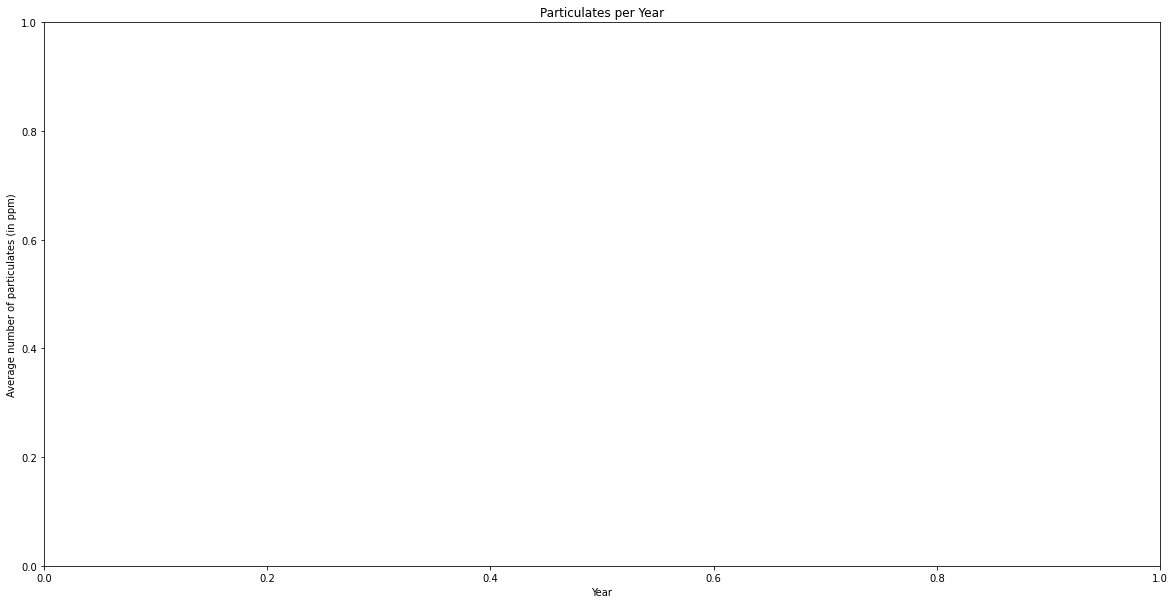

In [10]:
# Find yearly NO2, O3, SO2, and CO mean  
yearly_NO2 = pollution_data_clean_df.groupby(['Year']).agg({'NO2 AQI': [np.mean]})
yearly_O3 = pollution_data_clean_df.groupby(['Year']).agg({'O3 AQI': [np.mean]})
yearly_SO2 = pollution_data_clean_df.groupby(['Year']).agg({'SO2 AQI': [np.mean]})
yearly_CO = pollution_data_clean_df.groupby(['Year']).agg({'CO AQI': [np.mean]})
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.title('Particulates per Year')
plt.xlabel('Year')
plt.ylabel('Average number of particulates (in ppm)')
#plt.hist(yearly_PM2_5.index, yearly_PM2_5);
plt.plot(x='Year', y='NO2_AQI');
plt.plot(x='Year', y='O3_AQI');
plt.plot(x='Year', y='SO2_AQI');
plt.plot(x='Year', y='CO_AQI');
plt.plot(yearly_NO2.index, yearly_NO2);
plt.plot(yearly_O3.index, yearly_O3);
plt.plot(yearly_CO.index, yearly_CO);
plt.plot(yearly_SO2.index, yearly_SO2);
plt.legend([ 'NO2', 'O3', 'SO2', 'CO']);

In [ ]:
#merged_df = mortality_data_clean_df.combine_first(pollution_data_df)
# merged_df.to_csv("data_merged.csv")
#print(merged_df)

In [ ]:
# Combine the data into a single dataset
# merged_inner = pd.merge(left=mortality_data_df, right=pollution_data_df, left_on='County', right_on='County')
# merged_inner = pd.merge(mortality_data_df, pollution_data_df, how="outer", on=["County"])
# merged_inner
# merged_inner.to_csv('merged_inner.csv')
# merged_inner